## ✅ 손실함수 그래프 시각화

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# H(x) = wx + b: w = -1, b = 1
x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]

#### 1. (keras)Sequential 모형 클래스 객체 생성

In [3]:
# 신경망을 구성할 수 있는 클래스
tf.model = tf.keras.Sequential()

#### 2. add 메소드로 레이어(layer) 추가.
   - 입력단부터 순차적으로 추가한다.
   - 레이어는 출력(units) 뉴런 갯수를 첫번째 인수로 받는다.
   - 최초의 레이어는 input_dim 인수로 입력 크기를 설정해야 한다. 
   - activation 인수로 활성화 함수 설정한다. 

In [4]:
# dense()로 레이어 구성
tf.model.add(tf.keras.layers.Dense(units=1,             # 출력을 몇 개 할 것인지 
                                  input_dim=1,          # 입력의 개수 (단순 회귀이므로 1개의 입력 & 1개의 출력)
                                  activation='linear')  # 활성화 함수 파라미터에 어떤 모형을 만들어 줄 것인지 (여기서는 선형회귀)
            )

In [5]:
# 설정된 신경망 구성 확인
tf.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 기계학습을 시킬 알고리즘 정의 (경사하강법)
sgd = tf.keras.optimizers.SGD(learning_rate=0.1)

# 현재 모델에 compile 함수로 학습시에 필요한 정보들 추가 
tf.model.compile(loss='mse',      # 비용(|손실) 함수
                optimizer=sgd)    # 최적의 w값을 찾을 때 적용할 알고리즘 (신경망의 hyper-parameter)

In [7]:
# 모델학습 (손실값(loss)을 시각화하기 위해 변수에 저장)
loss = tf.model.fit(x_train,
                    y_train,
                    epochs=100    # 몇 번의 반복학습을 시킬건지 지정
                    )
# 아래 학습하는 과정에서 출력된 loss 값은 mse를 통해 계산된 값

Epoch 1/100
1/1 [==============================] - 0s 0s/step - loss: 14.1056
Epoch 2/100
1/1 [==============================] - 0s 994us/step - loss: 6.4974
Epoch 3/100
1/1 [==============================] - 0s 0s/step - loss: 3.0717
Epoch 4/100
1/1 [==============================] - 0s 997us/step - loss: 1.5245
Epoch 5/100
1/1 [==============================] - 0s 996us/step - loss: 0.8213
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 0.4975
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 0.3445
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 0.2687
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 0.2279
Epoch 10/100
1/1 [==============================] - 0s 0s/step - loss: 0.2033
Epoch 11/100
1/1 [==============================] - 0s 1ms/step - loss: 0.1863
Epoch 12/100
1/1 [==============================] - 0s 0s/step - loss: 0.1730
Epoch 13/100
1/1 [==============================] - 0s 1ms/

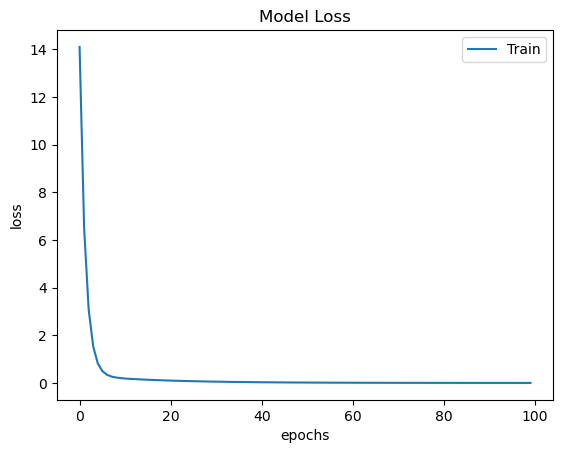

In [8]:
# 손실값(loss.history)의 변화를 시각화
plt.plot(loss.history['loss'])
plt.title("Model Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['Train'], loc='upper right')

In [9]:
weights = tf.model.layers[0].get_weights()
weights
# [-0.9994138 = w, 0.99827653 = bias]
# 이상적으로는 w=-1, b=1 값이 나와야 함

[array([[-0.97699386]], dtype=float32), array([0.9323591], dtype=float32)]